In [1]:
# World Happiness 2015

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import squarify
from matplotlib import pyplot as plt
sns.set_style("white")
import warnings
warnings.filterwarnings("ignore")
#plt.style.use('bmh')
pd.set_option('display.max_columns', 500)
import random

In [3]:
data = pd.read_csv(r'D:\PycharmProjects\EDA-ML\Happiness\2015.csv')

In [4]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [59]:
data['Happiness Groups']=pd.cut(data['Happiness Score'],5)

In [5]:
# Country - Name of the country.
# Region - Region the country belongs to.
# Happiness Rank - Rank of the country based on the Happiness Score.
# Happiness Score - A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
# Standard Error - The standard error of the happiness score.
# Economy (GDP per Capita) - The extent to which GDP contributes to the calculation of the Happiness Score.
# Family - The extent to which Family contributes to the calculation of the Happiness Score
# Health (Life Expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score
# Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score.
# Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score.
# Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score.
# Dystopia Residual - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

In [60]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Groups
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,"(6.637, 7.587]"
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,"(6.637, 7.587]"
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,"(6.637, 7.587]"
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,"(6.637, 7.587]"
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,"(6.637, 7.587]"


In [7]:
data.shape

(158, 12)

In [8]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [10]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [11]:
data['Country'].value_counts().sort_values(ascending=False).head()

Nepal         1
Chad          1
Sweden        1
Mozambique    1
Bhutan        1
Name: Country, dtype: int64

In [12]:
pd.DataFrame(data['Happiness Score'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,158.0,5.375734,1.14501,2.839,4.526,5.2325,6.24375,7.587


In [13]:
colory = []
colors_score = data['Happiness Score'].sort_values(ascending=False)
for i in range(30):
    if colors_score[i] >= colors_score.quantile(0.95):
        colory.append('#0B486B')
    elif colors_score[i] >= colors_score.quantile(0.86):
            colory.append('#c55572')
    else:
            colory.append('#b3b7b8')


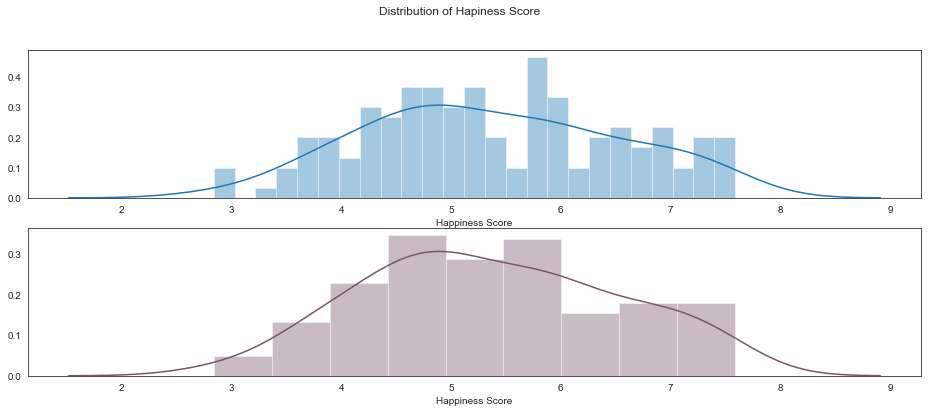

In [14]:
f,ax = plt.subplots(2,1,figsize=(16,6))
a0 = sns.distplot(data['Happiness Score'],bins=25,ax=ax[0])
a01 = sns.distplot(data['Happiness Score'],bins=9,ax=ax[1],color='#77566A')
plt.suptitle('Distribution of Hapiness Score');

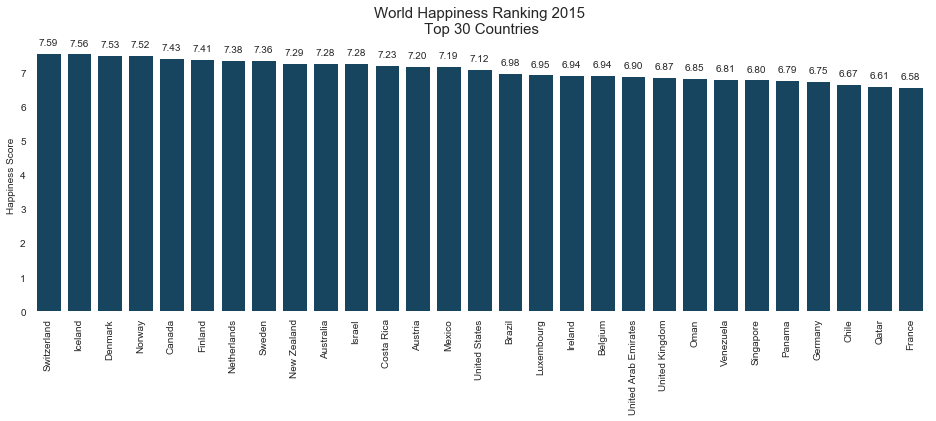

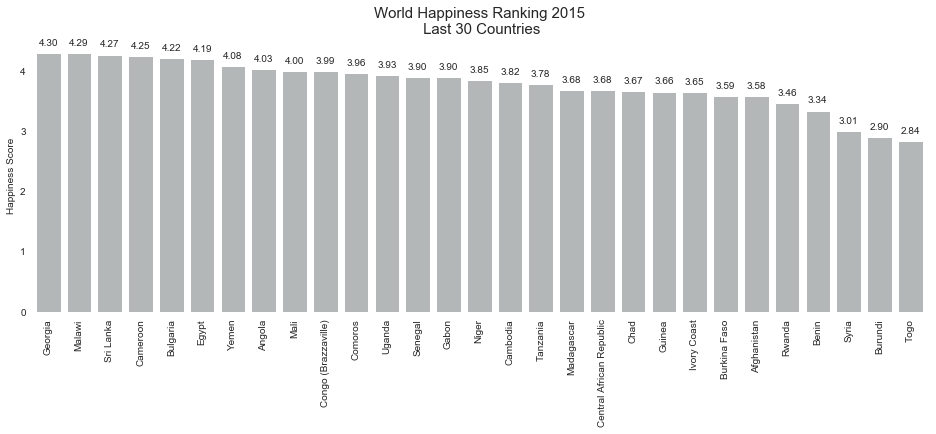

In [15]:
f,ax = plt.subplots(1,1,figsize=(16,5))
a1 = sns.barplot(x='Country',y='Happiness Score',data=data.head(29),ax=ax,color='#0B486B')
a1.set_xlabel('');
plt.xticks(rotation=90);
a1.set_title('World Happiness Ranking 2015\n Top 30 Countries',fontsize=15);
sns.despine(bottom=True,left=True);
for p in a1.patches:
    a1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
f,ax = plt.subplots(1,1,figsize=(16,5))    
a2 = sns.barplot(x='Country',y='Happiness Score',data=data.tail(29),ax=ax,color='#b3b7b8')
a2.set_xlabel('');
plt.xticks(rotation=90);
a2.set_title('World Happiness Ranking 2015\n Last 30 Countries',fontsize=15);
sns.despine(bottom=True,left=True);
for p in a2.patches:
    a2.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* Mean Happiness Score in 2015 was: 5.375734
* Most of countries has Happiness Score in range 4.5 - 6.5
* Top 5 Countries by Happiness Score are: 
    * Switzerland, 
    * Iceland, 
    * Denmark, 
    * Norwey, 
    * Canada 
* So we can see that in top 5 there are a lot of Nordic (Scandinavian) countries

* If we look at countries with lowest Happiness Score we can list:
    * Togo
    * Burundi
    * Syria
    * Benin
    * Rwanda

In [16]:
data.groupby('Region')['Happiness Score'].agg(['mean','count']).sort_values(by='mean',ascending=False).T

Region,Australia and New Zealand,North America,Western Europe,Latin America and Caribbean,Eastern Asia,Middle East and Northern Africa,Central and Eastern Europe,Southeastern Asia,Southern Asia,Sub-Saharan Africa
mean,7.285,7.273,6.689619,6.144682,5.626167,5.4069,5.332931,5.317444,4.580857,4.2028
count,2.000,2.000,21.000000,22.000000,6.000000,20.0000,29.000000,9.000000,7.000000,40.0000


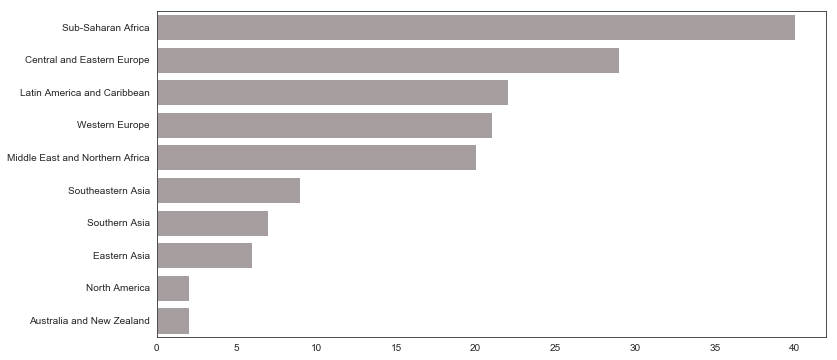

In [17]:
f,ax = plt.subplots(1,1,figsize=(12,6))
c0 = sns.barplot(y=data.groupby('Region')['Happiness Score'].count().sort_values(ascending=False).index,
            x= data.groupby('Region')['Happiness Score'].count().sort_values(ascending=False).values,palette=['#A89B9D'])
plt.xlabel('');
plt.ylabel('');

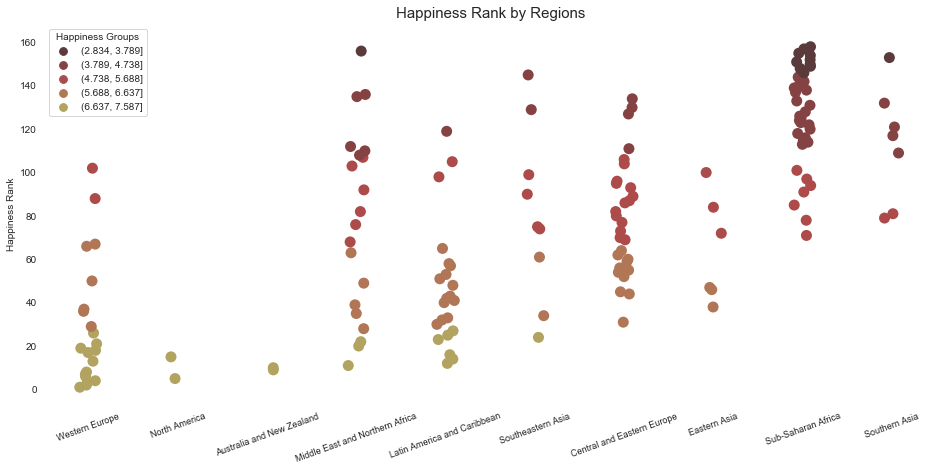

In [68]:
f,ax = plt.subplots(1,1,figsize=(16,7))
sp0 = sns.stripplot(x="Region", y="Happiness Rank", data=data, jitter=True,palette='tab20b_d',size=11,hue='Happiness Groups')
plt.xticks(rotation=20,fontsize=9);
plt.xlabel('');
sp0.set_title('Happiness Rank by Regions',fontsize=15);
sns.despine(left=True,bottom=True);

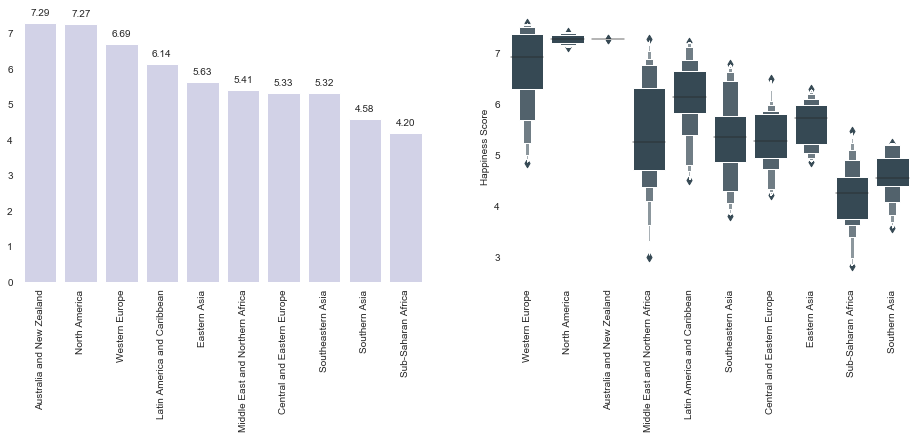

In [18]:
f,ax = plt.subplots(1,2,figsize=(16,5))
c1 = sns.barplot(x=data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False).index,
            y= data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False).values,ax=ax[0],palette=['#CFCFEA'])

#ax.set_xticklabels(labels, rotation=45)
for p in c1.patches:
    c1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')  
sns.despine(bottom=True, left=True)
c2 = sns.boxenplot(y='Happiness Score',x='Region',data=data,ax=ax[1],palette=['#314A59'])
plt.setp(c1.xaxis.get_majorticklabels(), rotation=90);
plt.setp(c2.xaxis.get_majorticklabels(), rotation=90);
c1.set_xlabel('');
c2.set_xlabel('');

In [19]:
regions = data['Region'].value_counts().index.to_list()
regions

['Sub-Saharan Africa',
 'Central and Eastern Europe',
 'Latin America and Caribbean',
 'Western Europe',
 'Middle East and Northern Africa',
 'Southeastern Asia',
 'Southern Asia',
 'Eastern Asia',
 'North America',
 'Australia and New Zealand']

In [20]:
cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

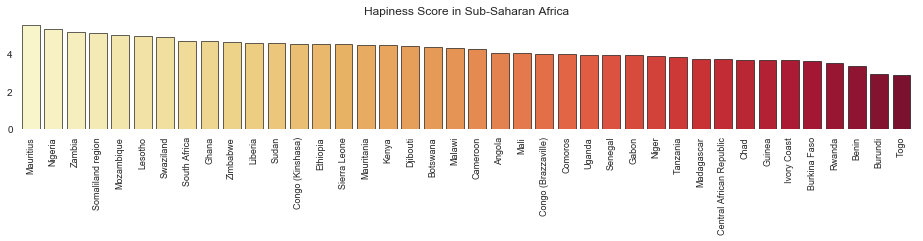

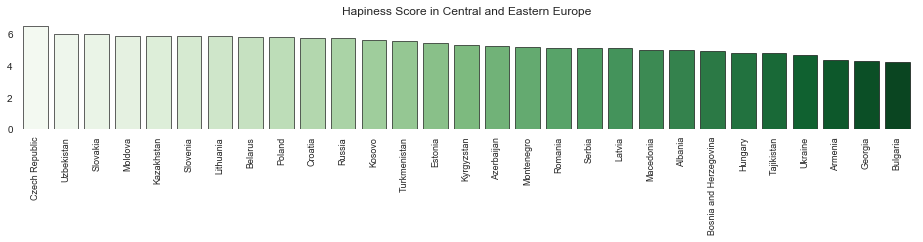

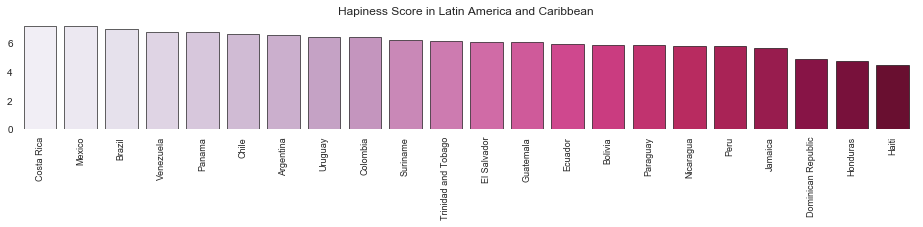

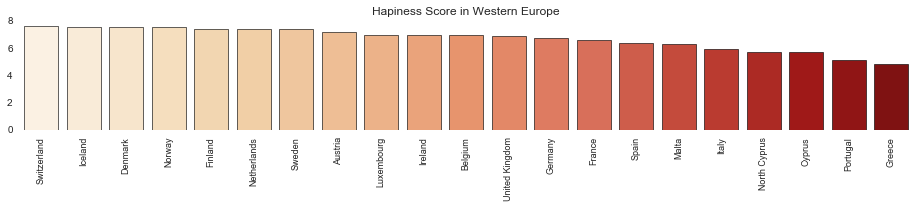

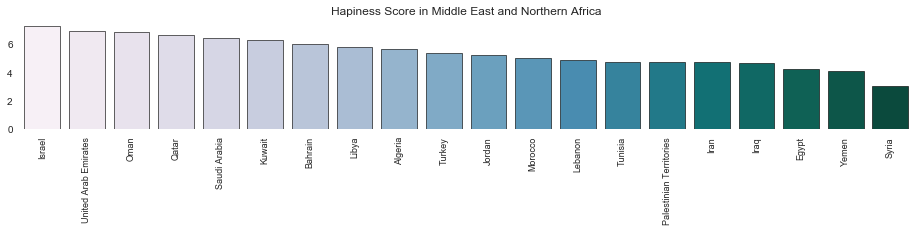

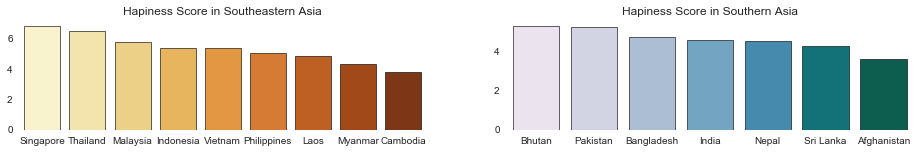

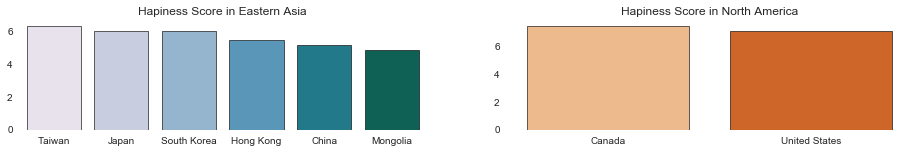

In [21]:
for i in regions[:5]:
    f,ax = plt.subplots(1,1,figsize=(16,2))
    o1 = sns.barplot(x='Country',y='Happiness Score',
                 data=data[data['Region']==i], palette=str(random.choice(cmaps)),linewidth=0.6,ec='k')
    o1.set_xlabel('');
    o1.set_ylabel('');
    o1.tick_params(axis='x', rotation=90,labelsize=9)
    sns.despine(bottom=True,left=True);
    o1.set_title(f'Hapiness Score in {i}',fontsize=12);
    
f,ax = plt.subplots(1,2,figsize=(16,2))
o1 = sns.barplot(x='Country',y='Happiness Score',
                         data=data[data['Region']==regions[5]], palette=str(random.choice(cmaps)),linewidth=0.6,ec='k',ax=ax[0])
o1.set_xlabel('');
o1.set_ylabel('');
#o1.tick_params(axis='x', rotation=90,labelsize=9)
sns.despine(bottom=True,left=True);
o1.set_title(f'Hapiness Score in {regions[5]}',fontsize=12);
o1 = sns.barplot(x='Country',y='Happiness Score',
                         data=data[data['Region']==regions[6]], palette=str(random.choice(cmaps)),linewidth=0.6,ec='k',ax=ax[1])
o1.set_xlabel('');
o1.set_ylabel('');
#o1.tick_params(axis='x', rotation=90,labelsize=9)
sns.despine(bottom=True,left=True);
o1.set_title(f'Hapiness Score in {regions[6]}',fontsize=12);

f,ax = plt.subplots(1,2,figsize=(16,2))

o1 = sns.barplot(x='Country',y='Happiness Score',
                         data=data[data['Region']==regions[7]], palette=str(random.choice(cmaps)),linewidth=0.6,ec='k',ax=ax[0])
o1.set_xlabel('');
o1.set_ylabel('');
#o1.tick_params(axis='x', rotation=90,labelsize=9)
sns.despine(bottom=True,left=True);
o1.set_title(f'Hapiness Score in {regions[7]}',fontsize=12);
o1 = sns.barplot(x='Country',y='Happiness Score',
                         data=data[data['Region']==regions[8]], palette=str(random.choice(cmaps)),linewidth=0.6,ec='k',ax=ax[1])
o1.set_xlabel('');
o1.set_ylabel('');
#o1.tick_params(axis='x', rotation=90,labelsize=9)
sns.despine(bottom=True,left=True);
o1.set_title(f'Hapiness Score in {regions[8]}',fontsize=12);

In [22]:
Top_Per_Region = pd.DataFrame(data.set_index('Country').groupby('Region')['Happiness Score'].nlargest(1)).reset_index()
Top_Per_Region['Region Country'] = Top_Per_Region['Country'] + ' (' + Top_Per_Region['Region']+')'

In [23]:
Top_Per_Region[['Country','Happiness Score']]

,Country,Happiness Score
0,New Zealand,7.286
1,Czech Republic,6.505
2,Taiwan,6.298
3,Costa Rica,7.226
4,Israel,7.278
5,Canada,7.427
6,Singapore,6.798
7,Bhutan,5.253
8,Mauritius,5.477
9,Switzerland,7.587


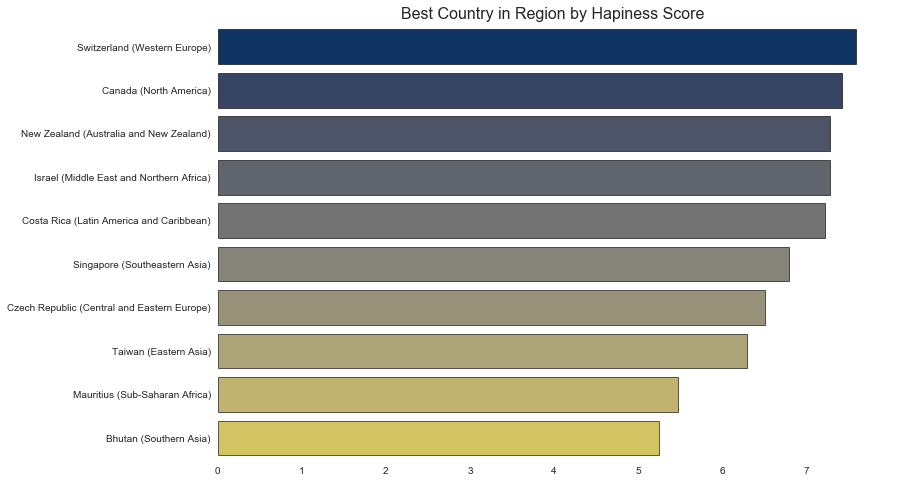

In [24]:
f,ax = plt.subplots(1,1,figsize=(12,8))

o1 = sns.barplot(y='Region Country',x='Happiness Score',
                         data=Top_Per_Region.sort_values(by='Happiness Score',ascending=False), palette='cividis',linewidth=0.6,ec='k')
o1.set_xlabel('');
o1.set_ylabel('');
sns.despine(bottom=True,left=True);
sns.despine(bottom=True,left=True);
o1.set_title(f'Best Country in Region by Hapiness Score',fontsize=16);

Top Happiness Score By regions: 
    
* New Zealand	7.286
* Czech Republic	6.505
* Taiwan	6.298
* Costa Rica	7.226
* Israel	7.278
* Canada	7.427
* Singapore	6.798
* Bhutan	5.253
* Mauritius	5.477
* Switzerland	7.587   

In [25]:
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


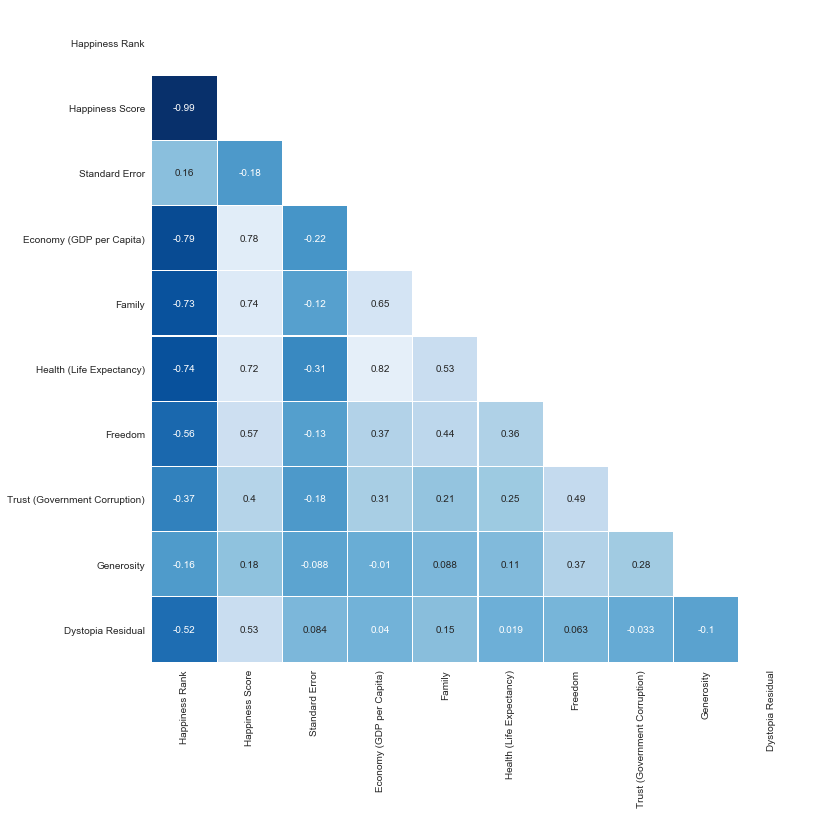

In [26]:
f,ax = plt.subplots(figsize=(12,12))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(),cmap='Blues_r',annot=True,linewidths=.1,square=True,mask=mask,cbar=False);
#plt.title('Correlation map for Olympics Data',fontsize=15)

In [27]:
corrs = pd.DataFrame([data.corr()['Happiness Score'],np.abs(data.corr()['Happiness Score'])]).T
corrs.columns= ['Corr','Absolute Corr']

In [28]:
corrs

,Corr,Absolute Corr
Happiness Rank,-0.992105,0.992105
Happiness Score,1.000000,1.000000
Standard Error,-0.177254,0.177254
Economy (GDP per Capita),0.780966,0.780966
Family,0.740605,0.740605
Health (Life Expectancy),0.724200,0.724200
Freedom,0.568211,0.568211
Trust (Government Corruption),0.395199,0.395199
Generosity,0.180319,0.180319
Dystopia Residual,0.530474,0.530474


We can see very strong correlation between Happiness Score and :
* Economy (GDP per Capita):	__0.780966__
* Family:	__0.740605__
* Health (Life Expectancy):	__0.724200__  
  
And correlation between 
* Freedom	__0.568211__
* Trust (Government Corruption)	__0.395199__
* Dystopia Residual	__0.530474__
  
  
This factors seems to have influence on Happiness 

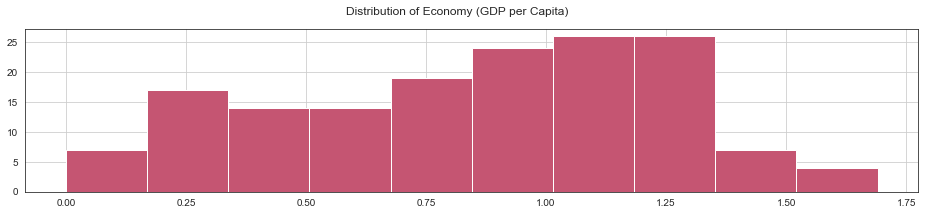

In [76]:
f,ax = plt.subplots(1,1,figsize=(16,3))
b0 = data['Economy (GDP per Capita)'].hist(color='#c55572')
plt.suptitle('Distribution of Economy (GDP per Capita)');

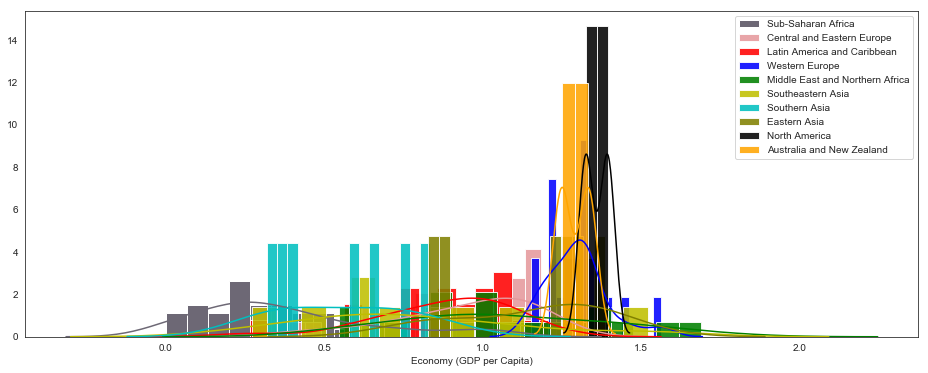

In [95]:
fig, ax = plt.subplots(figsize=(16,6))
sns.distplot( data[data['Region']==regions[0]]["Economy (GDP per Capita)"] , color="#6D6875", label=str(regions[0]),hist_kws=dict(alpha=1),bins=16)
sns.distplot( data[data['Region']==regions[1]]["Economy (GDP per Capita)"] , color="#E5989B", label=str(regions[1]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[2]]["Economy (GDP per Capita)"] , color="r",label=str(regions[2]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[3]]["Economy (GDP per Capita)"] , color="b", label=str(regions[3]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[4]]["Economy (GDP per Capita)"] , color="g", label=str(regions[4]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[5]]["Economy (GDP per Capita)"] , color="y", label=str(regions[5]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[6]]["Economy (GDP per Capita)"] , color="c", label=str(regions[6]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[7]]["Economy (GDP per Capita)"] , color="olive", label=str(regions[7]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[8]]["Economy (GDP per Capita)"] , color="k", label=str(regions[8]),hist_kws=dict(alpha=0.87),bins=2)
sns.distplot( data[data['Region']==regions[9]]["Economy (GDP per Capita)"] , color="orange", label=str(regions[9]),hist_kws=dict(alpha=0.87),bins=2)
plt.legend();

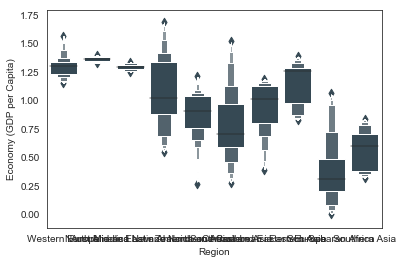

In [96]:
sns.boxenplot(y='Economy (GDP per Capita)',x='Region',data=data,palette=['#314A59'])